<a href="https://colab.research.google.com/github/Kamui964/Linear_Regression/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#importing all the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#reading medical price dataset
df=pd.read_csv('/content/Medical Price Dataset.csv')
print(df.shape) #to know total no. of rows and columns in dataset

(1338, 7)


In [52]:
print(df.columns) #to know columns present in dataset
df.head() #prints top 5 rows

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [53]:
df.describe() #to know statistical data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
df.isnull().sum() #to know total null values if any

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [55]:
df.drop_duplicates(keep='first',inplace=True) #to drop duplicates rows if any and keep the first row of duplicate row

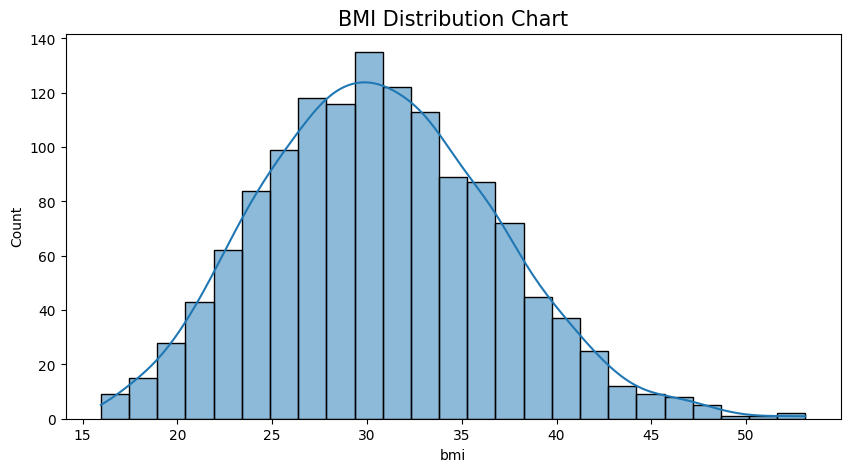

In [56]:
#to plot bmi distribution chart
plt.figure(figsize=(10,5))
sns.histplot(df.bmi,kde=True)
plt.title('BMI Distribution Chart',size=15)
plt.show()

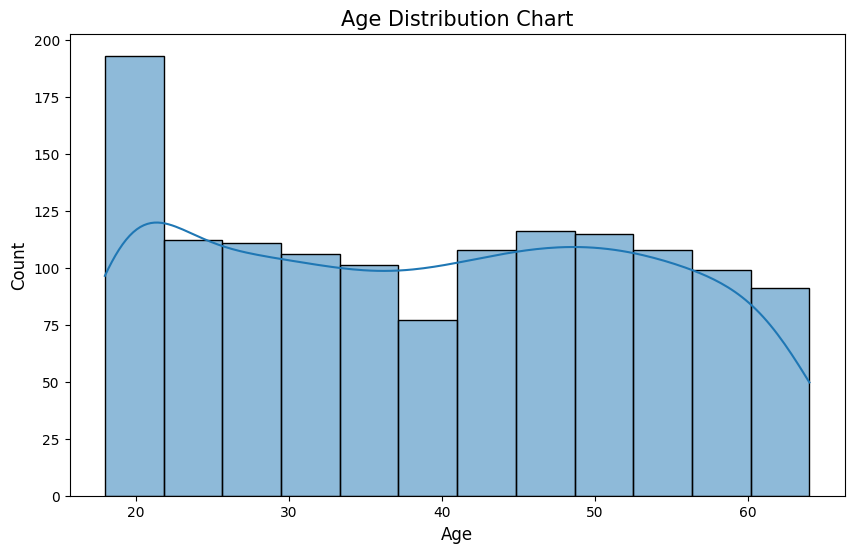

In [57]:
#to plot age distribution chart
plt.figure(figsize=(10,6))
sns.histplot(df.age,kde=True)
plt.title('Age Distribution Chart',size=15)
plt.xlabel('Age',size=12)
plt.ylabel('Count',size=12)
plt.show()

In [58]:
# to remove outliers using interquartile range 
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
df[(df['charges']< Q1-1.5* IQR) | (df['charges']> Q3+1.5* IQR)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


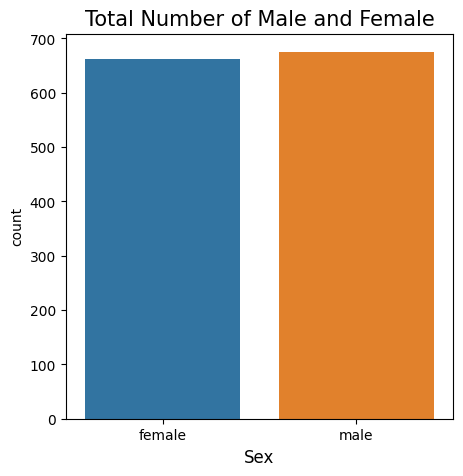

In [59]:
#plot to know total count of males and females
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=15)
plt.xlabel('Sex',size=12)
plt.show()

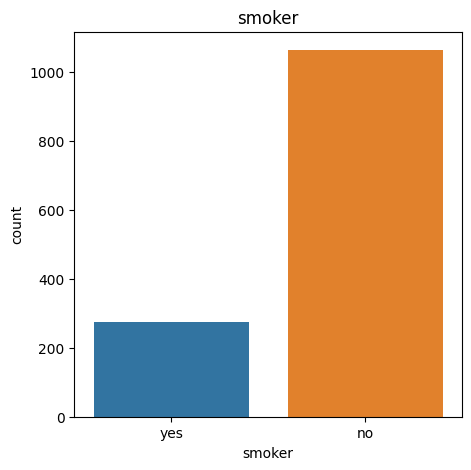

In [60]:
#to plot smoker count
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

<ipython-input-61-bfbd7304f78e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,square=True,


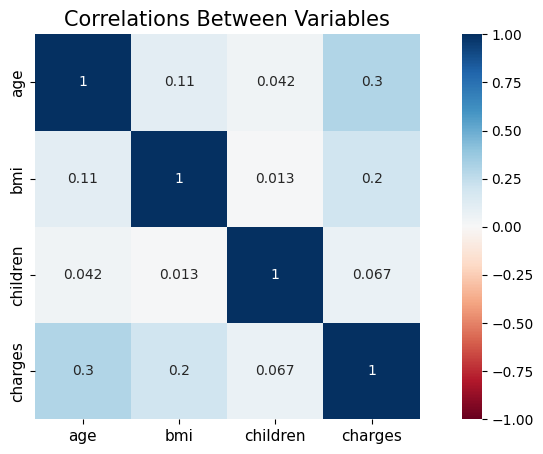

In [61]:
#heatmap plot
plt.figure(figsize = (11,5))
sns.heatmap(df.corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=15);
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

In [62]:
#independent and dependent features
X=df[["age","bmi","children"]].copy() #independent feature
y=df['charges'].copy() #dependent feature

In [63]:
X['intercept']=1 #adding ones column for bias
X=X[['intercept','age','bmi','children']]
X

,intercept,age,bmi,children
0,1,19,27.900,0
1,1,18,33.770,1
2,1,28,33.000,3
3,1,33,22.705,0
4,1,32,28.880,0
...,...,...,...,...
1333,1,50,30.970,3
1334,1,18,31.920,0
1335,1,18,36.850,0
1336,1,21,25.800,0


In [66]:
#implementation of linear regression algorithm
#y=xb+e -->y=xb
#b=(xt*x)^-1*xt*y
def Linear_Regression(x,y):
  x_t=x.T
  b=np.linalg.inv(x_t @ x)@x_t @ y
  b.index=x.columns
  y_pred=x @ b
  print('Predictions: ')
  print(y_pred)
  print('Mean Prediction: ')
  print(y_pred.mean())

  # R2 error calculation
  SSR=((y-y_pred)**2).sum()
  SST=((y-y.mean())**2).sum()
  R2=1-(SSR/SST)
  print('R2 error: ')
  print(R2)

  sns.lmplot(x='True Values', y='Predicted Values', data=pd.DataFrame({'True Values': y, 'Predicted Values': y_pred}), ci=None)

    # Add labels and title to the plot
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.title("Regression Plot")
  plt.show()

Predictions: 
520     14323.937759
575     16197.898353
770     22258.067606
314     10307.896085
426     11971.706186
            ...     
716     12823.480164
906     12596.784952
1097    10020.478461
235     11086.142844
1062    22533.776276
Length: 935, dtype: float64
Mean Prediction: 
13648.784499111194
R2 error: 
0.130017719000728


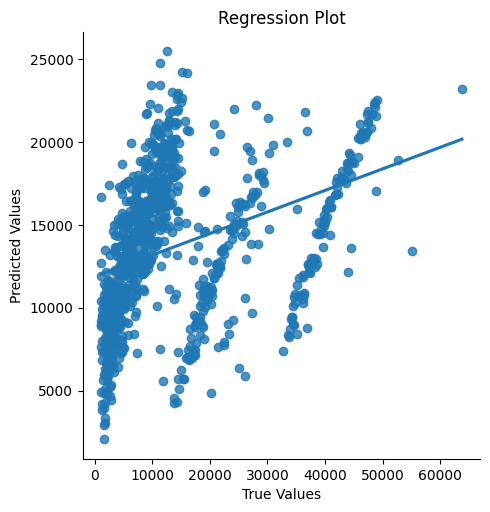

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #to split data into training and testing data
Linear_Regression(X_train,y_train) #prediction using training data